# Assignment 3 - Alphabet investing (Jaakko Wallenius, Quantitative Finance 28E35600)

In [1]:
%%capture
%run data.ipynb # The datasets are imported and prepared in the data notebook

In [2]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols

I choose characters $A$ and $S$. Hence the combinations are $\{AA,AS,SA,SS\}$. For each pair of letters a portfolio of stocks whose ticker starts with the given letters is formed.
* Portfolios are equally weighted
    * i.e. if $N \big( \{Stock \in \textrm{Universe}: \textrm{Stock's ticker stars with "AA"}\} \big) =m$ then each stocks in the "AA" -portfolio have weights $\frac{1}{m}$
* Portfolios are rebalanced monthly (adjusted back to equally weighted)
* Long short portfolios are formed for each pair $(j,k)$ where $j \neq k$
    * Total $4\times 3 = 12$

## Portfolio returns

In [3]:
def compute_monthly_returns(data,tickers, months):
    # Computes monthly returns of equally weighted portfolio for a given set of tickers
    # data: CRSP
    # tickers: array of tickers of which the portfolio is formed
    # Array of months in form: "DDMMMYYYY"
    returns = []
    for m in months:
        returns.append(data.loc[data['TICKER'].isin(tickers) & (data['date'] == m)]["RET"].values.mean())
    return pd.DataFrame({'date' : months, tickers[0][0:2] : returns})

### AA portfolio

In [4]:
aa_tickers = np.unique([ticker for ticker in data["TICKER"] if ticker[0:2] == "AA"])
print("Number of stocks in the portfolio: {}".format(aa_tickers.size))
data.loc[data['TICKER'].isin(aa_tickers)][["TICKER","COMNAM"]].drop_duplicates()

Number of stocks in the portfolio: 13


,TICKER,COMNAM
2199,AAN,AARONS INC
28511,AAMC,ALTISOURCE ASSET MANAGEMENT CORP
28850,AAOI,APPLIED OPTOELECTRONICS INC
37158,AAPL,APPLE INC
40893,AAVL,AVALANCHE BIOTECHNOLOGIES INC
43965,AAC,A A C HOLDINGS INC
54112,AAME,ATLANTIC AMERICAN CORP
61756,AA,ALCOA CORP
77083,AAL,AMERICAN AIRLINES GROUP INC
80249,AA,ALCOA INC


In [5]:
aa_returns = compute_monthly_returns(data,aa_tickers,months)
print_ret_table(aa_returns)

,date,AA
0,201501,-0.103707
1,201502,0.066992
2,201503,0.002867
57,201910,0.032459
58,201911,0.032124
59,201912,0.030376


### AS portfolio

In [6]:
as_tickers = np.unique([ticker for ticker in data["TICKER"] if ticker[0:2] == "AS"])
print("Number of stocks in the portfolio: {}".format(as_tickers.size))
data.loc[data['TICKER'].isin(as_tickers)][["TICKER","COMNAM"]].drop_duplicates()

Number of stocks in the portfolio: 24


,TICKER,COMNAM
1689,ASTE,ASTEC INDUSTRIES INC
4081,ASBI,AMERIANA BANCORP
11255,ASMB,ASSEMBLY BIOSCIENCES INC
15030,ASBB,A S B BANCORP INC
33719,ASPX,AUSPEX PHARMACEUTICALS INC
40014,ASPN,ASPEN AEROGELS INC
44017,AST,ASTERIAS BIOTHERAPEUTICS INC
49922,ASB,ASSOCIATED BANC CORP
61077,ASIX,ADVANSIX INC
65622,ASV,A S V HOLDINGS INC


In [7]:
as_returns = compute_monthly_returns(data,as_tickers,months)
print_ret_table(as_returns)

,date,AS
0,201501,-0.016612
1,201502,0.168871
2,201503,0.041293
57,201910,0.090374
58,201911,0.088209
59,201912,0.088870


### SA portfolio

In [8]:
sa_tickers = np.unique([ticker for ticker in data["TICKER"] if ticker[0:2] == "SA"])
print("Number of stocks in the portfolio: {}".format(sa_tickers.size))
data.loc[data['TICKER'].isin(sa_tickers)][["TICKER","COMNAM"]].drop_duplicates()

Number of stocks in the portfolio: 25


,TICKER,COMNAM
4660,SAFM,SANDERSON FARMS INC
13500,SAVE,SPIRIT AIRLINES INC
18273,SAEX,SAEXPLORATION HOLDINGS INC
24185,SAUC,DIVERSIFIED RESTAURANT HLDGS INC
26560,SAMG,SILVERCREST ASSET MNGMNT GRP INC
27824,SALE,RETAILMENOT INC
28777,SAIC,SCIENCE APPLICATIONS INTL CORP
37686,SABR,SABRE CORP
42004,SAGE,SAGE THERAPEUTICS INC
68332,SAIL,SAILPOINT TECHNOLOGIES HLDGS INC


In [9]:
sa_returns = compute_monthly_returns(data,sa_tickers,months)
print_ret_table(sa_returns)

,date,SA
0,201501,-0.018605
1,201502,0.042850
2,201503,0.009731
57,201910,-0.008770
58,201911,0.145700
59,201912,0.113067


### SS portfolio

In [10]:
ss_tickers = np.unique([ticker for ticker in data["TICKER"] if ticker[0:2] == "SS"])
print("Number of stocks in the portfolio: {}".format(ss_tickers.size))
data.loc[data['TICKER'].isin(ss_tickers)][["TICKER","COMNAM"]].drop_duplicates()

Number of stocks in the portfolio: 18


,TICKER,COMNAM
12974,SSSS,SUTTER ROCK CAPITAL CORP
17370,SSH,SUNSHINE HEART INC
19290,SSC,SEVEN STARS CLOUD GROUP INC
21209,SSTK,SHUTTERSTOCK INC
23555,SSNI,SILVER SPRING NETWORKS INC
39053,SSE,SEVENTY SEVEN ENERGY INC
46668,SSRG,SYMMETRY SURGICAL INC
65311,SSNT,SILVERSUN TECHNOLOGIES INC
66477,SSTI,SHOTSPOTTER INC
108857,SSY,SUNLINK HEALTH SYSTEMS INC


In [11]:
ss_returns = compute_monthly_returns(data,ss_tickers,months)
print_ret_table(ss_returns)

,date,SS
0,201501,-0.061009
1,201502,0.128496
2,201503,0.019882
57,201910,0.077112
58,201911,0.136793
59,201912,0.076834


### Long-short portfolios

In [12]:
portfolios = pd.concat([aa_returns,as_returns,sa_returns,ss_returns],axis=1)
portfolios = portfolios.loc[:,~portfolios.columns.duplicated()]
portfolios['AAAS'] = portfolios['AA'] - portfolios['AS'] ## AAAS = AA portfolio long, AS portfolio short
portfolios['AASA'] = portfolios['AA'] - portfolios['SA']
portfolios['AASS'] = portfolios['AA'] - portfolios['SS']

portfolios['ASAA'] = portfolios['AS'] - portfolios['AA']
portfolios['ASSA'] = portfolios['AS'] - portfolios['SA']
portfolios['ASSS'] = portfolios['AS'] - portfolios['SS']

portfolios['SAAA'] = portfolios['SA'] - portfolios['AA']
portfolios['SAAS'] = portfolios['SA'] - portfolios['AS']
portfolios['SASS'] = portfolios['SA'] - portfolios['SS']

portfolios['SSAA'] = portfolios['SS'] - portfolios['AA']
portfolios['SSAS'] = portfolios['SS'] - portfolios['AS']
portfolios['SSSA'] = portfolios['SS'] - portfolios['SA']

print_ret_table(portfolios)

,date,AA,AS,SA,SS,AAAS,AASA,AASS,ASAA,ASSA,ASSS,SAAA,SAAS,SASS,SSAA,SSAS,SSSA
0,201501,-0.103707,-0.016612,-0.018605,-0.061009,-0.087095,-0.085102,-0.042698,0.087095,0.001993,0.044397,0.085102,-0.001993,0.042404,0.042698,-0.044397,-0.042404
1,201502,0.066992,0.168871,0.042850,0.128496,-0.101878,0.024142,-0.061504,0.101878,0.126020,0.040375,-0.024142,-0.126020,-0.085645,0.061504,-0.040375,0.085645
2,201503,0.002867,0.041293,0.009731,0.019882,-0.038426,-0.006864,-0.017015,0.038426,0.031561,0.021411,0.006864,-0.031561,-0.010150,0.017015,-0.021411,0.010150
57,201910,0.032459,0.090374,-0.008770,0.077112,-0.057915,0.041229,-0.044653,0.057915,0.099144,0.013262,-0.041229,-0.099144,-0.085882,0.044653,-0.013262,0.085882
58,201911,0.032124,0.088209,0.145700,0.136793,-0.056085,-0.113577,-0.104670,0.056085,-0.057492,-0.048585,0.113577,0.057492,0.008907,0.104670,0.048585,-0.008907
59,201912,0.030376,0.088870,0.113067,0.076834,-0.058494,-0.082691,-0.046458,0.058494,-0.024197,0.012037,0.082691,0.024197,0.036234,0.046458,-0.012037,-0.036234


Summary table of portfolios returns.

In [13]:
portfolios.describe()

,AA,AS,SA,SS,AAAS,AASA,AASS,ASAA,ASSA,ASSS,SAAA,SAAS,SASS,SSAA,SSAS,SSSA
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.002190,0.011883,0.009224,0.013487,-0.009693,-0.007034,-0.011297,0.009693,0.002660,-0.001603,0.007034,-0.002660,-0.004263,0.011297,0.001603,0.004263
std,0.063852,0.069445,0.058694,0.068723,0.054178,0.046177,0.054473,0.054178,0.049255,0.057905,0.046177,0.049255,0.046700,0.054473,0.057905,0.046700
min,-0.170737,-0.153536,-0.146719,-0.159724,-0.154406,-0.113577,-0.123374,-0.085322,-0.095052,-0.198871,-0.086283,-0.126020,-0.112275,-0.127787,-0.126073,-0.083757
25%,-0.026280,-0.024234,-0.020311,-0.033741,-0.039294,-0.038966,-0.044676,-0.025746,-0.028421,-0.036944,-0.025685,-0.032463,-0.027964,-0.024002,-0.028102,-0.028122
50%,0.013100,0.010066,0.007994,0.014872,-0.000119,-0.009075,-0.017368,0.000119,-0.004954,0.004675,0.009075,0.004954,0.005027,0.017368,-0.004675,-0.005027
75%,0.041061,0.042197,0.039699,0.050189,0.025746,0.025685,0.024002,0.039294,0.032463,0.028102,0.038966,0.028421,0.028122,0.044676,0.036944,0.027964
max,0.154172,0.195629,0.207854,0.163772,0.085322,0.086283,0.127787,0.154406,0.126020,0.126073,0.113577,0.095052,0.083757,0.123374,0.198871,0.112275


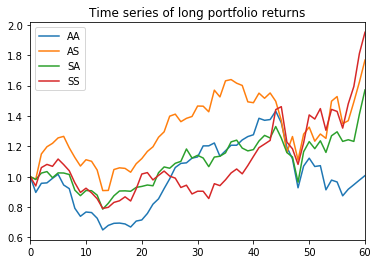

In [15]:
pd.concat([pd.DataFrame({'AA': 1, 'AS': 1, 'SA': 1, 'SS': 1}, index=[0]),
           (portfolios.drop('date', 1)[['AA','AS','SA','SS']] + 1)
           .cumprod()]).reset_index(drop=True).plot(title='Time series of long portfolio returns')

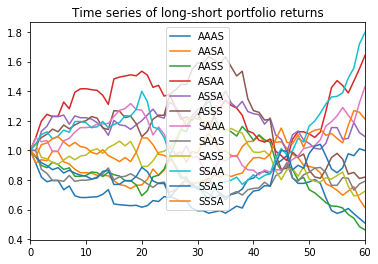

In [16]:
pd.concat([pd.DataFrame({'AAAS': 1, 'AASA': 1, 'AASS': 1, 
                         'ASAA': 1, 'ASSA': 1, 'ASSS': 1, 
                         'SAAA': 1, 'SAAS': 1, 'SASS': 1,
                         'SSAA': 1, 'SSAS': 1, 'SSSA': 1}, 
                        index=[0]),
           (portfolios.drop('date', 1)[['AAAS','AASA','AASS',
                                        'ASAA','ASSA','ASSS',
                                        'SAAA','SAAS','SASS',
                                        'SSAA','SSAS','SSSA']] + 1)
           .cumprod()]).reset_index(drop=True).plot(title='Time series of long-short portfolio returns')

For the further analyzed long-short portfolios I choose set $\{SSAA,ASAA,SAAA,SSSA\}$

## Time series regressions

The above alphabet portfolios and the chosen long-short portfolios are further analyzed by regressing their returns agains asset pricing models. I use data from https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html.
From section "Developed Markets Factors and Returns" file Fama/French North American 5 Factors.

**Note**: the market factor is the same as in assignment 1:

$(Mkt-RF)_{New}:=vwretd-RF$

### CAPM

Model:

$R_{i,t}^e=\alpha_i+\beta_iR_{M,t}^e+\epsilon_{i,t}$

Where $R_{i,t}^e=R_{i,t}-R_f:=$ Excess return of portfolio $i$ at time $t$, $R_{M,t}^e=R_{M,t}-R_f:=$ Market excess return

### Fama-French 3-Factor model

Model:

$R_{i,t}^e=\alpha_i+b_iR_{M,t}^e+s_iSMB_t+h_iHML_t+\epsilon_{i,t}$

Where $R_{i,t}^e, R_{M,t}^e$ as above and $SMB,HML$ are the size and value factors, respectively.

### Fama-French 5-Factor model

Model:

$R_{i,t}^e=\alpha_i+b_iR_{M,t}^e+s_iSMB_t+h_iHML_t+r_iRMF_t+c_iCMA_t+\epsilon_{i,t}$

With addional factors to the 3-factor model: $RMF$ = spread within most and least profitable firms, $CMA$ = spread within the most conservative and agressive investors

### Data

In [17]:
print_ret_table(factors)

,index,SMB,HML,RMW,CMA,RF,vwret,Mkt-RF
0,2.94,-0.0119,-0.0389,0.0214,-0.0111,0.0000,-0.027201,-0.027201
1,2.95,0.0057,-0.0136,-0.0105,-0.0196,0.0000,0.056021,0.056021
2,2.96,0.0250,-0.0093,0.0000,-0.0056,0.0000,-0.010453,-0.010453
57,3.51,0.0002,-0.0147,0.0105,-0.0094,0.0015,0.019265,0.017765
58,3.52,0.0021,-0.0279,-0.0167,-0.0139,0.0012,0.034971,0.033771
59,3.53,0.0082,0.0143,-0.0020,0.0155,0.0014,0.028448,0.027048


### Results

In [18]:
analyzed_portfolios = ['AA','AS','SA','SS','SSAA','ASAA','SAAA','SSSA']
excess_returns = portfolios[analyzed_portfolios].apply(lambda portfolio: portfolio-factors['RF'])
reg_data = pd.concat([excess_returns,factors],axis=1).rename({'Mkt-RF':'MKT'},axis='columns')
print_ret_table(reg_data)

,AA,AS,SA,SS,SSAA,ASAA,SAAA,SSSA,index,SMB,HML,RMW,CMA,RF,vwret,MKT
0,-0.103707,-0.016612,-0.018605,-0.061009,0.042698,0.087095,0.085102,-0.042404,2.94,-0.0119,-0.0389,0.0214,-0.0111,0.0000,-0.027201,-0.027201
1,0.066992,0.168871,0.042850,0.128496,0.061504,0.101878,-0.024142,0.085645,2.95,0.0057,-0.0136,-0.0105,-0.0196,0.0000,0.056021,0.056021
2,0.002867,0.041293,0.009731,0.019882,0.017015,0.038426,0.006864,0.010150,2.96,0.0250,-0.0093,0.0000,-0.0056,0.0000,-0.010453,-0.010453
57,0.030959,0.088874,-0.010270,0.075612,0.043153,0.056415,-0.042729,0.084382,3.51,0.0002,-0.0147,0.0105,-0.0094,0.0015,0.019265,0.017765
58,0.030924,0.087009,0.144500,0.135593,0.103470,0.054885,0.112377,-0.010107,3.52,0.0021,-0.0279,-0.0167,-0.0139,0.0012,0.034971,0.033771
59,0.028976,0.087470,0.111667,0.075434,0.045058,0.057094,0.081291,-0.037634,3.53,0.0082,0.0143,-0.0020,0.0155,0.0014,0.028448,0.027048


In [19]:
import collections

def signic_star(pvalue): 
    if pvalue <= 0.01: return '***'
    elif pvalue <= 0.05: return '**'
    elif pvalue <= 0.10: return '*'
    else: return ''

def t_alphas_tstats_portfolio(portfolio,data):
    capm = ols(portfolio + '~ MKT', data).fit()
    ff_3 = ols(portfolio + '~ MKT + SMB + HML', data).fit()
    ff_5 = ols(portfolio + '~ MKT + SMB + HML + RMW + CMA', data).fit()
    alphas = {'CAPM alpha' : capm.params['Intercept'], 'FF3 alpha' : ff_3.params['Intercept'], 'FF5 alpha' : ff_5.params['Intercept']}
    tstats = {'CAPM tstat' : capm.tvalues['Intercept'], 'FF3 tstat' : ff_3.tvalues['Intercept'], 'FF5 tstat' : ff_5.tvalues['Intercept']}
    pvalues = {'CAPM*' : signic_star(capm.pvalues['Intercept']), 
               'FF3*' : signic_star(ff_3.pvalues['Intercept']), 
               'FF5*' : signic_star(ff_5.pvalues['Intercept'])}
    d = {**{'Portfolio' : portfolio}, **alphas, **tstats, **pvalues}
    return collections.OrderedDict(sorted(d.items()))

def regression_result_table(portfolios,data):
    rows = []
    for p in portfolios:
        rows.append(t_alphas_tstats_portfolio(p,data))
    return pd.DataFrame(rows).set_index('Portfolio')

# Output: Results table

In [20]:
regression_result_table(analyzed_portfolios,reg_data)

,CAPM alpha,CAPM tstat,CAPM*,FF3 alpha,FF3 tstat,FF3*,FF5 alpha,FF5 tstat,FF5*
Portfolio,,,,,,,,,
AA,-0.009515,-1.686110,*,-0.007137,-1.270059,,-0.006988,-1.230853,
AS,-0.000773,-0.126184,,0.003484,0.607795,,0.003714,0.644515,
SA,-0.001982,-0.404420,,0.001464,0.337780,,0.001315,0.302695,
SS,0.001589,0.246795,,0.005800,0.996695,,0.005839,0.988296,
SSAA,0.010286,1.419814,,0.012142,1.649688,,0.012036,1.606596,
ASAA,0.007924,1.099162,,0.009826,1.326120,,0.009911,1.313545,
SAAA,0.006716,1.093384,,0.007806,1.236289,,0.007512,1.201993,
SSSA,0.002753,0.443460,,0.003542,0.550648,,0.003732,0.580870,


### Discussion

None of the strategies produce significant alpha with respect to any of the pricing models. $SSAA$ -strategy seems to have the most potential as it has alpha with respect to all of the models (also near significant).